In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Root Finding
Root finding is a very import part of mathematics from 8th grade alegebra to solving the time independent schrodinger equation in quantum mechanics. There are differnet methods of solving for roots, some being better than others in terms of operating time. The first one to talk about is the very basic method called the **Bisection Method**. 

## Bisection method
This method isnt really a formula based method like the others that will be mentioned, its purely algorithmic. What you are doing is starting with an initial point, which is the midpoint between the bounds $[a,b]$, with this point you plug it into the function. You then multiply that value with the value of the fucntion at the lower and upper bound. Which ever one returns a negative value means that the zero is in between those bounds, so say $f(c) * f(b) = -n$ where n is some numeber, then the bounds now become $[c,b]$ and the process comtinues until we have found our root. 

## Fixed point iteration
Fixed point iteration is the next step up from bisection method. The idea is that each iteration will lead to a better approximation for the root. The formula for this is

\begin{equation}
x_{i + 1} = f(x_i) + x
\end{equation}

Not much else to say about this method its pretty straight forward.

## Newton's method
Newton's method is a root finding method, just like the other's mentioned previously. This method is of the form

\begin{equation}
x_{i + 1} = x_i - \frac{f(x_i)}{f'(x_i)}
\end{equation}

which requires a well thought out initial guess (or else will lead to no root) and requires the derivative of the function. The point of this iterative method is to get a better approximation of the roots of $f(x)$ after each iteration; this function can be complex as well. Our goal is to find the 'cubed roots of unity,' which are numbers such that $Z^3 = 1$. We need to visit the complex plane to find these other roots, $Z = 1$ being the obvious one. The complex plane can be represented as a polar plane with the coordinates as $\cos(\theta)$ and $i\sin(\theta)$. Using the basic cartesian to polar conversions we get that $Z(r,\theta)$, where we only care about a radius $ r = 1$. The transformation becomes $Z^3 = \cos(3\theta) + i\sin(3\theta)$ with $\theta = 0$ an obvious solution to $Z^3 = 1$. With a little more inspection we can find the other two roots right away, being the fact that we need a real solution. This means that we need the complex part to be zero and since these are cyclic functions we just increment by $2\pi$. $\cos(3\theta) = 0$ for $\theta = 0, \frac{2\pi}{3}, \frac{4\pi}{3}, \ldots $. Now if we pick any coordinate, in the range of $-1,1$ and $-i,i$ and use newton's method they should converge to any of these 3 roots. Let's apply the method 

In [2]:
npts = 10
x = np.linspace(-1,1,npts)    #setting up the 2D array of points
y = np.linspace(-1j,1j,npts)
X, Y = np.meshgrid(x,y)
Z = X + Y                     
niters = 15
for i in range(niters):
    Z = Z - (Z**3 - 1)/(3*Z**2)
print(Z)

[[-0.5 -8.66025404e-01j -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j
  -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j
  -0.5 -8.66025404e-01j -0.5 +8.66025404e-01j -0.5 -8.66025404e-01j
   1.0 +0.00000000e+00j]
 [-0.5 -8.66025404e-01j -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j
  -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j
  -0.5 -8.66025404e-01j -0.5 +8.66025404e-01j  1.0 +0.00000000e+00j
   1.0 +0.00000000e+00j]
 [-0.5 -8.66025404e-01j -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j
  -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j  1.0 +2.36658272e-29j
  -0.5 +8.66025404e-01j  1.0 +0.00000000e+00j  1.0 +0.00000000e+00j
   1.0 +0.00000000e+00j]
 [-0.5 -8.66025404e-01j -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j
  -0.5 -8.66025404e-01j -0.5 -8.66025404e-01j -0.5 +8.66025404e-01j
  -0.5 +8.66025404e-01j  1.0 +0.00000000e+00j  1.0 +0.00000000e+00j
   1.0 +0.00000000e+00j]
 [ 1.0 +0.00000000e+00j  1.0 +0.00000000e+00j  1.0 +0.00000000e+00j
   1.0 +0.000000

From what we printed out, we can see three values, $1, -.5 + .8660254j, -.5 - .8660254j$ appear to be the roots of this function. So we have $Z = \cos(\theta) + i\sin(\theta)$ when $r = 1$ with the roots we found earlier for $Z^3$ we get 

In [3]:
roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])
print(roots)

[ 1.0+0.j        -0.5+0.8660254j -0.5-0.8660254j]


They both match, so our Newton's method worked. Now we want to see which points converge to the three zeros of the function $Z^3 = 1$. We can do so by establishing a color to each of the roots, $0$ is red, $-0.5+0.8660254j$ is green and $-0.5-0.8660254j$ is blue. In order to actually accomplish this we use the fact that python has a sort of automatic type conversion. If we test all the values of the $Z$ which is our approxation of the roots of our function with the actual roots it will return a true or false value for each element in the array. We want the image to be clear so we'll need to change the size of the grid. 

In [4]:
def newton(bs,be,bcomps,bcompe, npts = 1000,niters = 100):
    x = np.linspace(bs,be,npts)    #setting up the 2D array of points
    y = np.linspace(bcomps,bcompe,npts)
    X, Y = np.meshgrid(x,y)
    Z = X + Y                     
    for i in range(niters):
        Z = Z - (Z**3 - 1)/(3*Z**2)
    tol = .0001
    root1 = abs(Z - roots[0]) < tol
    root2 = np.abs(Z - roots[1]) < tol
    root3 = np.abs(Z - roots[2]) < tol
    img = np.zeros((npts,npts,3))
    img[:,:,0] = root1
    img[:,:,1] = root2
    img[:,:,2] = root3
    plt.figure(figsize = (8,8))
    plt.imshow(img)

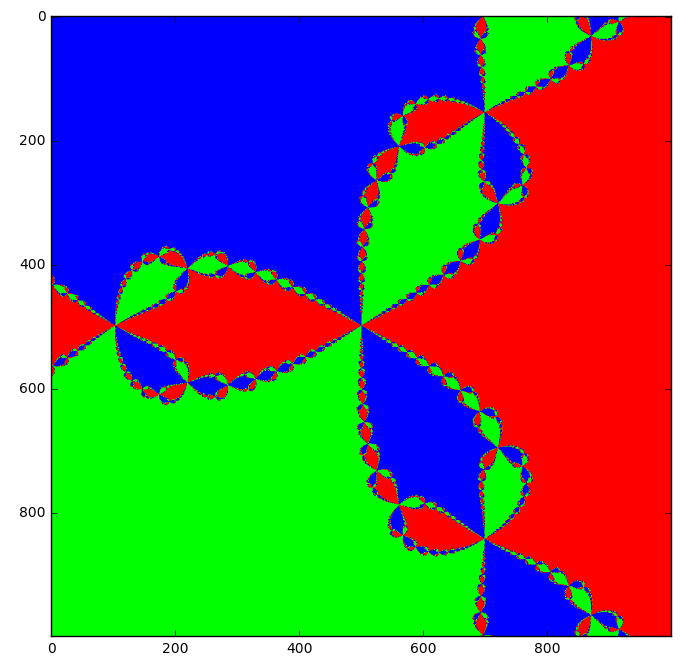

In [5]:
newton(-1,1,-1j, 1j)

From this we can see a sort of fractal pattern that forms. Its hard to tell what exactly is going on, but it seems that these points of convergence have to deal with the roots. There are tons of points where this weird convergence seems to happen so I'll fit a bunch or circles over them and see if they correspond to some circle of a smaller radius.

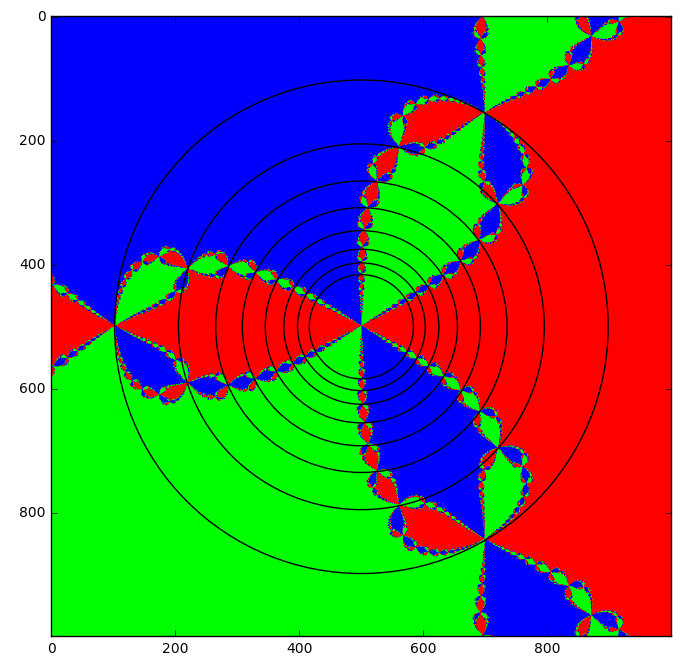

In [6]:
npts = 1000
x = np.linspace(-1,1,npts)
y = np.linspace(-1j,1j,npts)
X, Y = np.meshgrid(x,y)
Z = X + Y
niters = 100
for i in range(niters):
    Z = Z - (Z**3 - 1)/(3*Z**2)
roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])
tol = .01
root1 = abs(Z - roots[0]) < tol
root2 = np.abs(Z - roots[1]) < tol
root3 = np.abs(Z - roots[2]) < tol
img = np.zeros((npts,npts,3))
img[:,:,0] = root1
img[:,:,1] = root2
img[:,:,2] = root3
plt.figure(figsize = (8,8))
ax = plt.gca()
circle1 = plt.Circle((500,500), 398, fill = False)
circle2 = plt.Circle((500,500), 295, fill = False)
circle3 = plt.Circle((500,500), 235, fill = False)
circle4 = plt.Circle((500,500), 192, fill = False)
circle5 = plt.Circle((500,500), 155, fill = False)
circle6 = plt.Circle((500,500), 125, fill = False)
circle7 = plt.Circle((500,500), 103, fill = False)
circle8 = plt.Circle((500,500), 84, fill = False)
ax.imshow(img)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
ax.add_patch(circle6)
ax.add_patch(circle7)
ax.add_patch(circle8)

They do seem to fit pretty well, I'm still not entirely sure what these points are. We can zoom in on these's weird points to see whats going on.

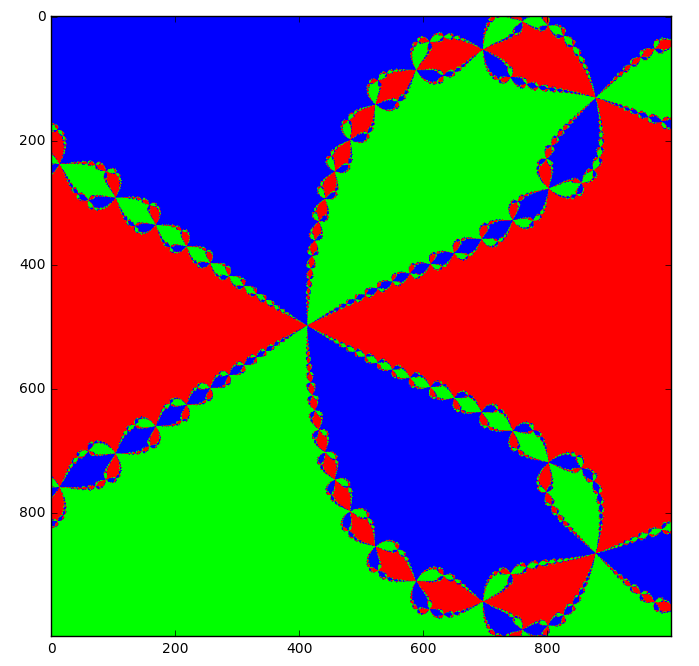

In [7]:
newton(-1,-.5,-.25j,.25j)

The pattern seems to go on forever and it doesnt seem to matter what point we look at so for simplicities sake im just going to zoom in on the origin. Going very far the pattern does repeat as expected, but when we get far enough we get this.

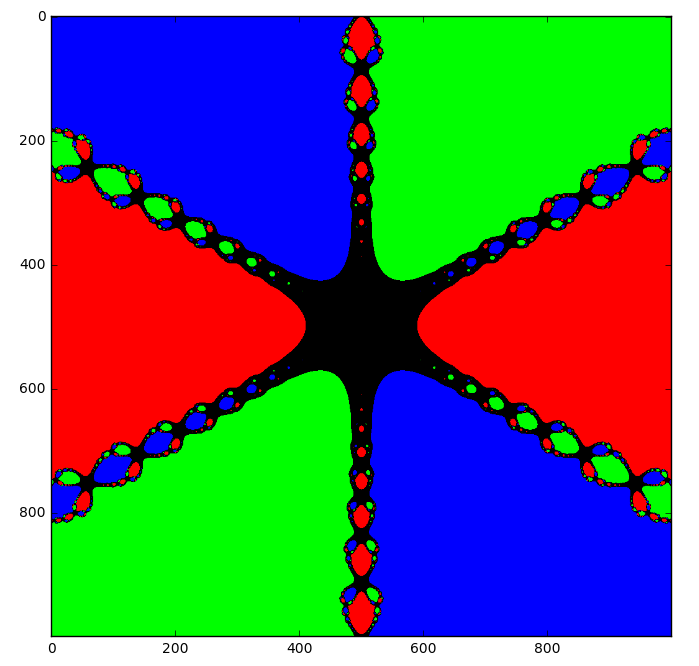

In [8]:
newton(-1e-8,1e-8,-1e-8j,1e-8j)

Which might seem like we've progressed farther them man should go, but not really, we just need to add more iterations and points. Once we do that, everything back to normal. 

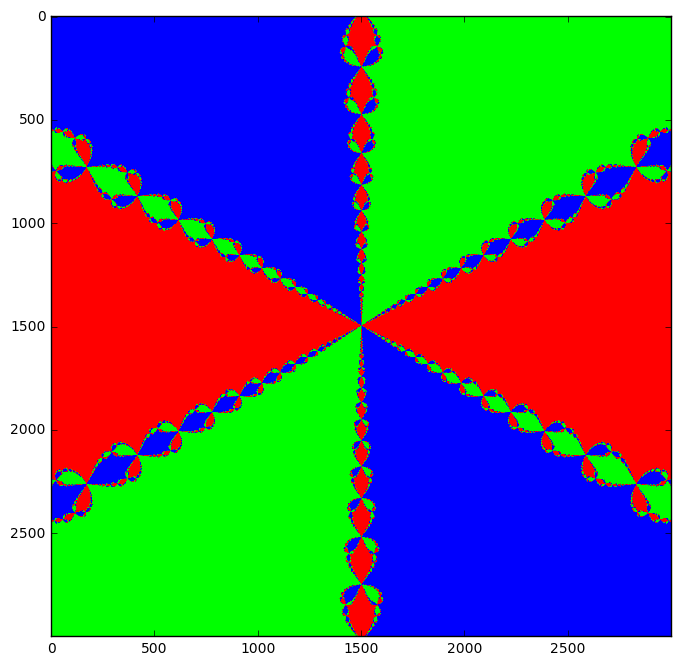

In [9]:
newton(-1e-8,1e-8,-1e-8j,1e-8j, npts = 3000, niters = 1000)

After zooming in and with basic observations we can see that this does indeed create a fractal pattern. With this method it doesnt seem like there's much more we can do to analyze it more. Now instead of only having an image of what points converge to our three roots, we can create an image of the speed in which they converge. To do this we just test convergence after every iteration and add 1 or 0 to the element if they converge or not, respectively. This results in

In [10]:
def newton_speed(bs,be,bcomps,bcompe, npts = 1000,niters = 100):
    x = np.linspace(bs,be,npts)    #setting up the 2D array of points
    y = np.linspace(bcomps,bcompe,npts)
    X, Y = np.meshgrid(x,y)
    Z = X + Y   
    root1con = np.zeros((npts,npts))
    root2con = np.zeros((npts,npts))
    root3con = np.zeros((npts,npts))
    tol = .01
    for i in range(niters):
        Z = Z - (Z**3 - 1)/(3*Z**2)
        root1 = np.abs(Z - roots[0]) < tol
        root2 = np.abs(Z - roots[1]) < tol
        root3 = np.abs(Z - roots[2]) < tol
        root1con += root1
        root2con += root2
        root3con += root3
    img = (1/niters)*root1con + (1/niters)*root2con + (1/niters)*root3con
    plt.figure(figsize = (8,8))
    plt.imshow(img, cmap = 'inferno', interpolation = 'nearest')
    plt.colorbar()

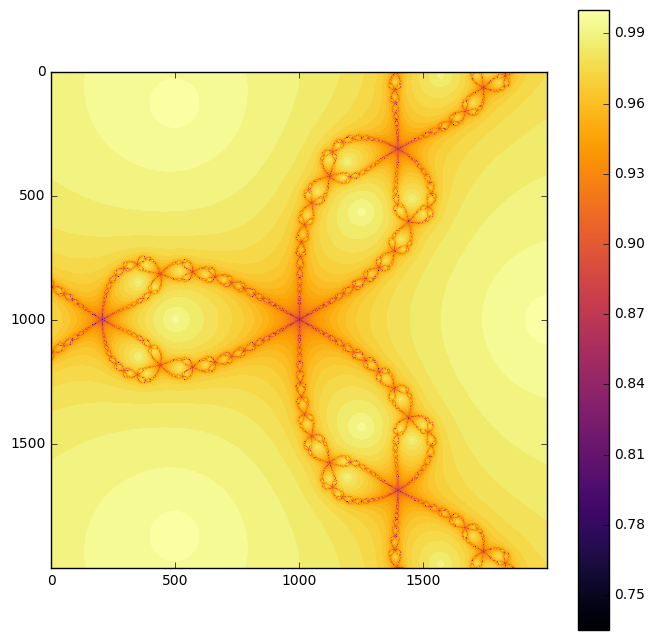

In [11]:
newton_speed(-1,1,-1j, 1j, npts = 2000, niters = 200 )

Using the plot from earlier we see that the points that intersected with the circle in the begining are the places where convergence takes the longest along with the center. You can also see a contour map type parttern form in the pools around the main pattern. The spots that converge the fastest seem to be right around the actual roots for $r = 1$. I tried to see if its the same for smaller radius, but I can't tell. We can zoom in farther to see what happens, we'll do so by zooming into the origin.

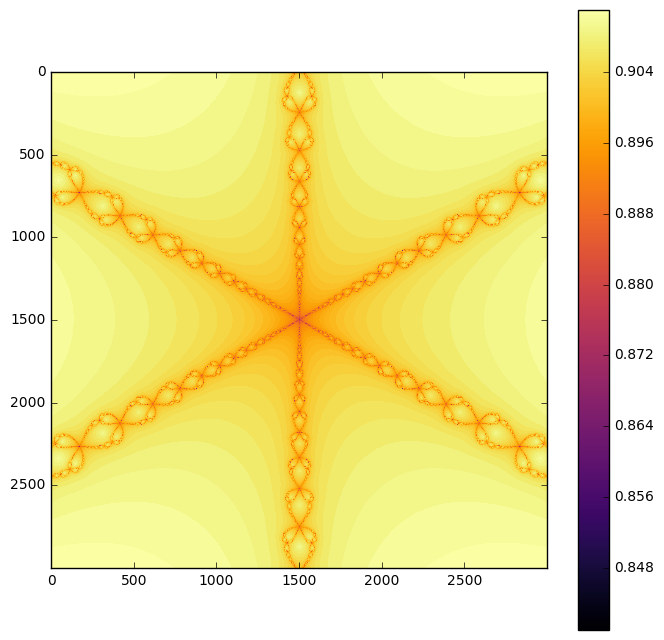

In [13]:
newton_speed(-1e-8,1e-8,-1e-8j,1e-8j, npts = 3000, niters = 1000)

Its similar to what we saw earlier in the fact that it just goes on forever and the center takes the longest to converge. From the form of the equation $Z^3 = 1$ there's no way I could have predicted this behavior. I'm still not entirely sure why this happens, but then again I'm not super familiar with the complex plane so this might not be as complicated as i think it is. 